In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
iris_data = pd.read_csv('../input/iris/Iris.csv', index_col='Id')
iris_data.head(25)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


<AxesSubplot:xlabel='Species', ylabel='count'>

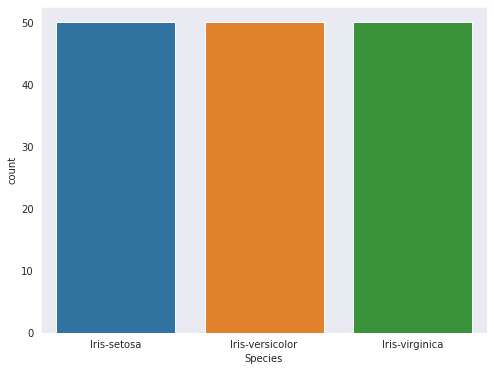

In [5]:
sns.set_style('dark')
plt.figure(figsize=(8,6))
sns.countplot(x='Species', data=iris_data)


In [6]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
iris_data['Label_Species'] = LE.fit_transform(iris_data['Species'])
iris_data.sample(n=10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label_Species
Id,,,,,,
17,5.4,3.9,1.3,0.4,Iris-setosa,0
133,6.4,2.8,5.6,2.2,Iris-virginica,2
56,5.7,2.8,4.5,1.3,Iris-versicolor,1
71,5.9,3.2,4.8,1.8,Iris-versicolor,1
135,6.1,2.6,5.6,1.4,Iris-virginica,2
64,6.1,2.9,4.7,1.4,Iris-versicolor,1
51,7.0,3.2,4.7,1.4,Iris-versicolor,1
39,4.4,3.0,1.3,0.2,Iris-setosa,0
68,5.8,2.7,4.1,1.0,Iris-versicolor,1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris_data_num = iris_data.drop('Species', axis=1)

X = iris_data_num.drop('Label_Species', axis=1)
y = iris_data_num['Label_Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [8]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
105,6.5,3.0,5.8,2.2
90,5.5,2.5,4.0,1.3
117,6.5,3.0,5.5,1.8
83,5.8,2.7,3.9,1.2
113,6.8,3.0,5.5,2.1


In [9]:
y_train.head()

Id
105    2
90     1
117    2
83     1
113    2
Name: Label_Species, dtype: int64

#  **Decision Tree Classifier**

In [10]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
print('Accuracy :', accuracy_score(y_pred, y_test))

Accuracy : 0.9666666666666667


# Random Forest

In [11]:
RF = RandomForestClassifier(n_estimators=50)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print('Accuracy :', accuracy_score(y_pred, y_test))

Accuracy : 0.9666666666666667


# SVM

In [12]:
SVM = SVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print('Accuracy :', accuracy_score(y_pred, y_test))

Accuracy : 0.9666666666666667


In [13]:
models = [DTC, RF, SVM]
accuracy = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_accuracy = accuracy_score(y_pred, y_test)
    accuracy.append(model_accuracy)

print(accuracy)

[0.9666666666666667, 0.9333333333333333, 0.9666666666666667]


In [14]:
Names = pd.DataFrame({'Name':['DTC', 'RF', 'SVM']})

acc = pd.DataFrame(accuracy)
acc.rename(columns={0:'Accuracy Score'}, inplace=True)
DF_Accuracy = pd.concat([Names, acc], axis=1)
DF_Accuracy

,Name,Accuracy Score
0,DTC,0.966667
1,RF,0.933333
2,SVM,0.966667
